# Task 3: Customer Segmentation / Clustering

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

### Step 1: Load the datasets

In [23]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

### Step 2: Merge datasets on CustomerID

In [ ]:
customer_transactions = pd.merge(customers, transactions, on='CustomerID')

### Step 3: Aggregate transaction data by CustomerID


In [ ]:
agg_data = customer_transactions.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    total_quantity=('Quantity', 'sum'),
    total_value=('TotalValue', 'sum')
).reset_index()

### Step 4: Merge aggregated data with customer profile

In [ ]:
customer_data = pd.merge(customers, agg_data, on='CustomerID', how='left').fillna(0)

### Step 5: Encode categorical variables


In [ ]:
le = LabelEncoder()
customer_data['Region'] = le.fit_transform(customer_data['Region'])

### Step 6: Normalize numerical features

In [ ]:
scaler = StandardScaler()
numerical_features = ['total_transactions', 'total_quantity', 'total_value']
data_normalized = scaler.fit_transform(customer_data[numerical_features])

### Step 7: Perform Agglomerative Clustering

In [28]:
optimal_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
clusters = agg_clustering.fit_predict(data_normalized)
customer_data['Cluster'] = clusters

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Step 8: Calculate clustering metrics

In [29]:
db_index = davies_bouldin_score(data_normalized, clusters)
silhouette_avg = silhouette_score(data_normalized, clusters)

### Step 9: Print clustering metrics


In [30]:
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

Davies-Bouldin Index: 0.9336173263844397
Silhouette Score: 0.3314384767578363


### Step 10: Visualize the clusters using a dendrogram


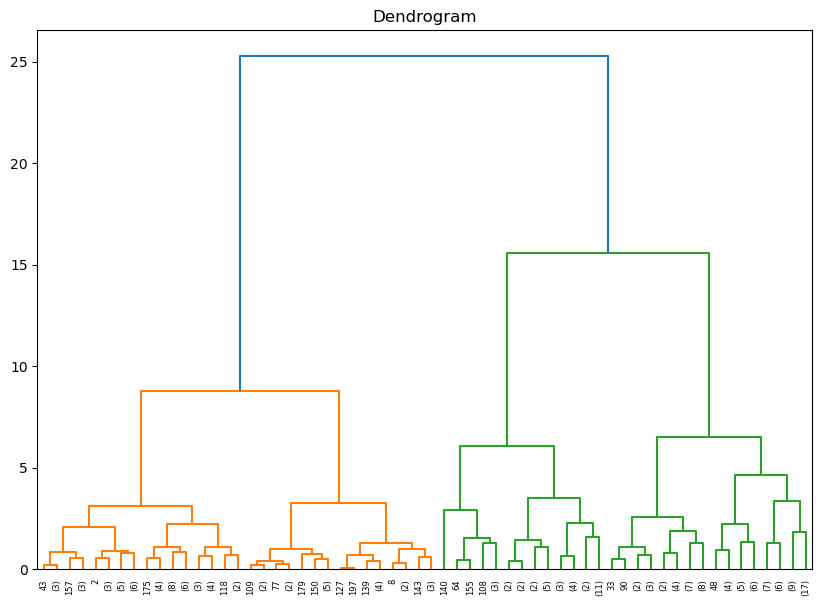

In [31]:
linked = linkage(data_normalized, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.show()

### Step 11: PCA for visualization of clusters


In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)
customer_data['PCA1'] = data_pca[:, 0]
customer_data['PCA2'] = data_pca[:, 1]

### Step 12: Scatter plot of clusters
 

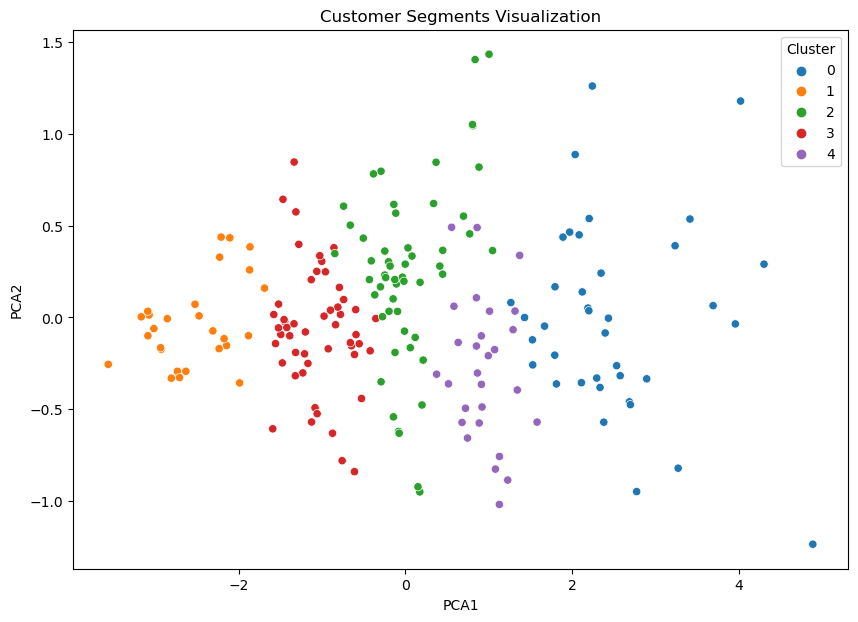

In [33]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Customer Segments Visualization')
plt.show()

### Step 13: Summary of clusters


In [35]:
# Summary of clusters
cluster_summary = customer_data.groupby('Cluster')[numerical_features].mean()
print(cluster_summary)

         total_transactions  total_quantity  total_value
Cluster                                                 
0                  8.157895       21.815789  6083.723158
1                  1.703704        3.592593   816.316296
2                  5.527273       12.290909  3251.331273
3                  3.500000        9.000000  2414.148846
4                  5.642857       16.678571  4729.092143
